In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 

In [2]:
dta = sm.datasets.fair.load_pandas().data

In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [5]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [6]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [7]:
dta['affair'] = (dta.affairs > 0).astype(int)

In [8]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [9]:
dta['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

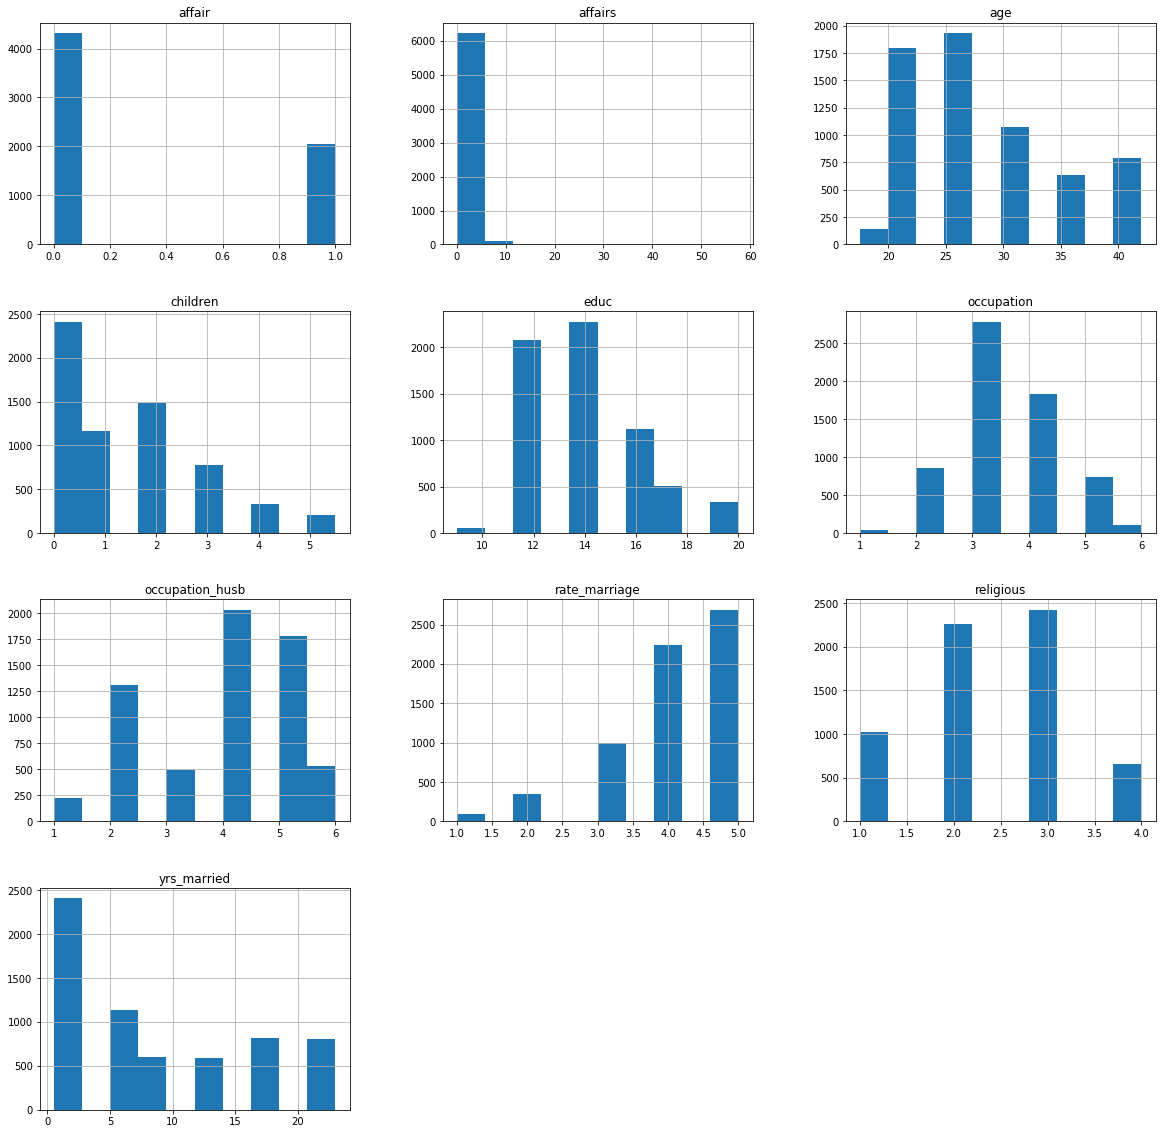

In [10]:
dta.hist(figsize=(20,20))
plt.show()

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

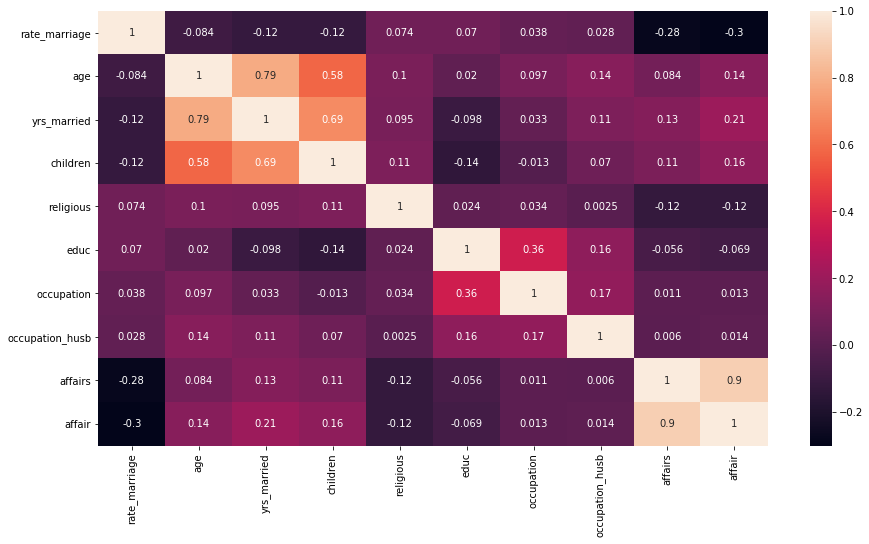

In [12]:
#Get Correlation between different variables
import seaborn as sns
corr = dta.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dta.columns

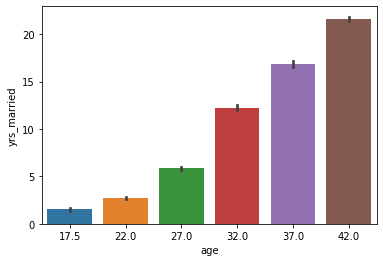

In [13]:
sns.barplot(x='age', y='yrs_married', data=dta)

In [15]:
dta.drop(['yrs_married'], axis=1, inplace=True)

In [16]:
dta.shape

(6366, 9)

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [17]:
dta.head()

,rate_marriage,age,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [18]:
dta.drop(['affairs'], axis=1, inplace=True)

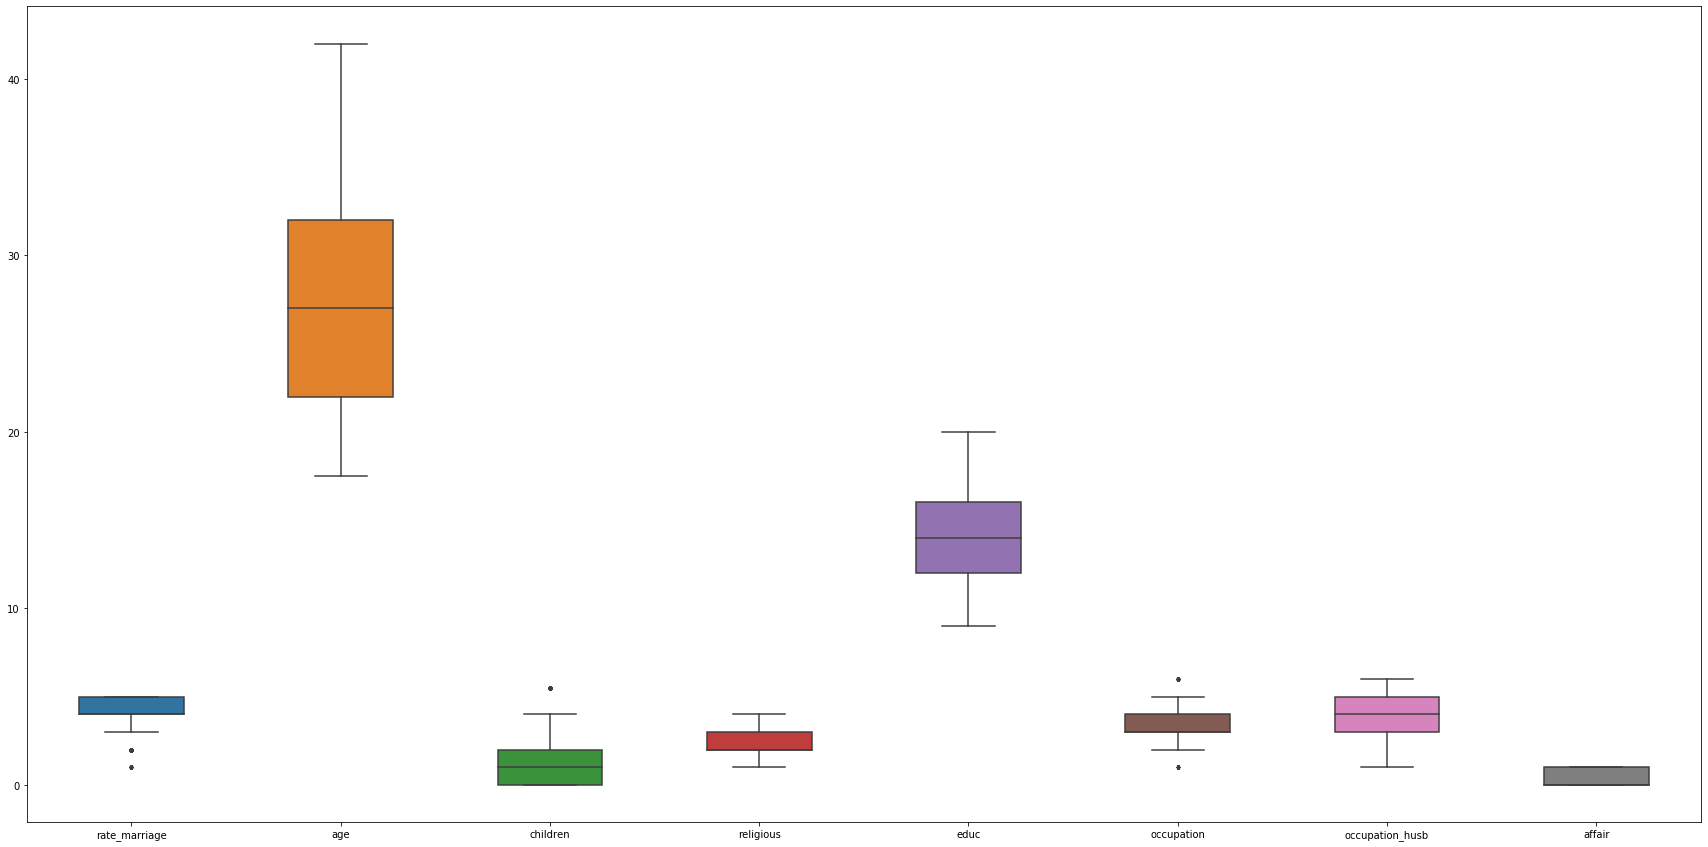

In [19]:
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(data=dta, width= 0.5,ax=ax,  fliersize=3)

In [20]:
y = dta['affair']
X = dta.drop(columns=['affair'])

In [21]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [22]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.034432,rate_marriage
1,1.934505,age
2,1.945969,children
3,1.036904,religious
4,1.237633,educ
5,1.206647,occupation
6,1.082696,occupation_husb


In [23]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [24]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
log_reg.score(x_train, y_train)

0.7211981566820277

In [26]:
log_reg.score(x_test, y_test)

0.7116834170854272

In [27]:
y_pred = log_reg.predict(x_test)

In [28]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7116834170854272

In [29]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[976, 108],
       [351, 157]], dtype=int64)

In [30]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [31]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7116834170854272

In [32]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9003690036900369

In [33]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7354935945742276

In [34]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7354935945742276

In [35]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7354935945742276

In [36]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8096225632517629

In [37]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6047120609001365

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

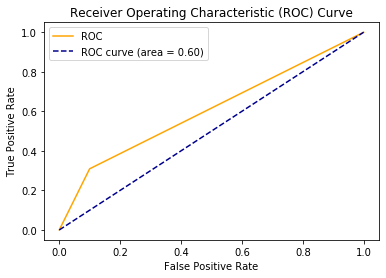

In [39]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [49]:
# saving the model to the local file system
import pickle
filename = 'logreg_model.pickle'
pickle.dump(log_reg, open(filename, 'wb'))

In [53]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scalar.transform([[1, 27, 0, 2, 12, 4, 3]]))
a

array([1])